## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 3 : Explore the inferential statistics on the dataset.

## imports

In [1]:
import pandas
import numpy
import statistics
import scipy.stats
import matplotlib.pyplot as pyplot
import warnings
import random

## Configurations

initializing matplotlib configurations

In [2]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

hiding warnings

In [3]:
warnings.filterwarnings('ignore')

reading dataset

In [4]:
ANOVA_Data=pandas.read_excel("../Reference_Data/ANOVA_TAJ.xlsx")
TTEST_Data=pandas.read_excel("../Reference_Data/ttest_Pre Post Score.xlsx")

In [5]:
def normalDistributionGraphGenarator(data:numpy.array,*ExtraArguments)->None:
    """Normalization graph plotter function

    Args:
        data (numpy.array): Any Array or DataFrame Column
    """
    pyplot.figure('Normal Distribution Graph')
    data=numpy.sort(data)
    pyplot.plot(data, scipy.stats.norm.pdf(data, numpy.mean(data),numpy.std(data)))
    for data in ExtraArguments:
        data=numpy.sort(data)
        pyplot.plot(data, scipy.stats.norm.pdf(data, numpy.mean(data),numpy.std(data)))
    pyplot.xlabel('values')
    pyplot.ylabel("Normalized Values")

In [57]:
def HypothesisComparerUsingPValue(probability_value:float,Level_of_Significance=0.05)-> bool:
    """NULL Hypothesis comparer based on probability_values

    Args:
        probability_value (float): probability value for falling in population
        Level_of_Significance (float, optional): Minimum Probability of occurrence of in range, Defaults to 0.05.

    Returns:
        bool: return True if NULL hypothesis is accepted
    """
    if probability_value>=Level_of_Significance:
        print("NULL Hypothesis is Accepted")
        return True
    else:
        print("NULL hypothesis is Rejected")
        return False

## Data Exploration

printing ANOVA Table

In [6]:
ANOVA_Data

,Honey Chicken,Pepper Chicken,Spicy Chicken,Tandoori Chicken
0,7,6,8,6
1,8,7,6,5
2,8,7,6,7
3,9,7,7,6
4,8,5,7,7
5,8,8,8,6
6,8,6,6,5


Normalization graph for all columns of ANOVA Data

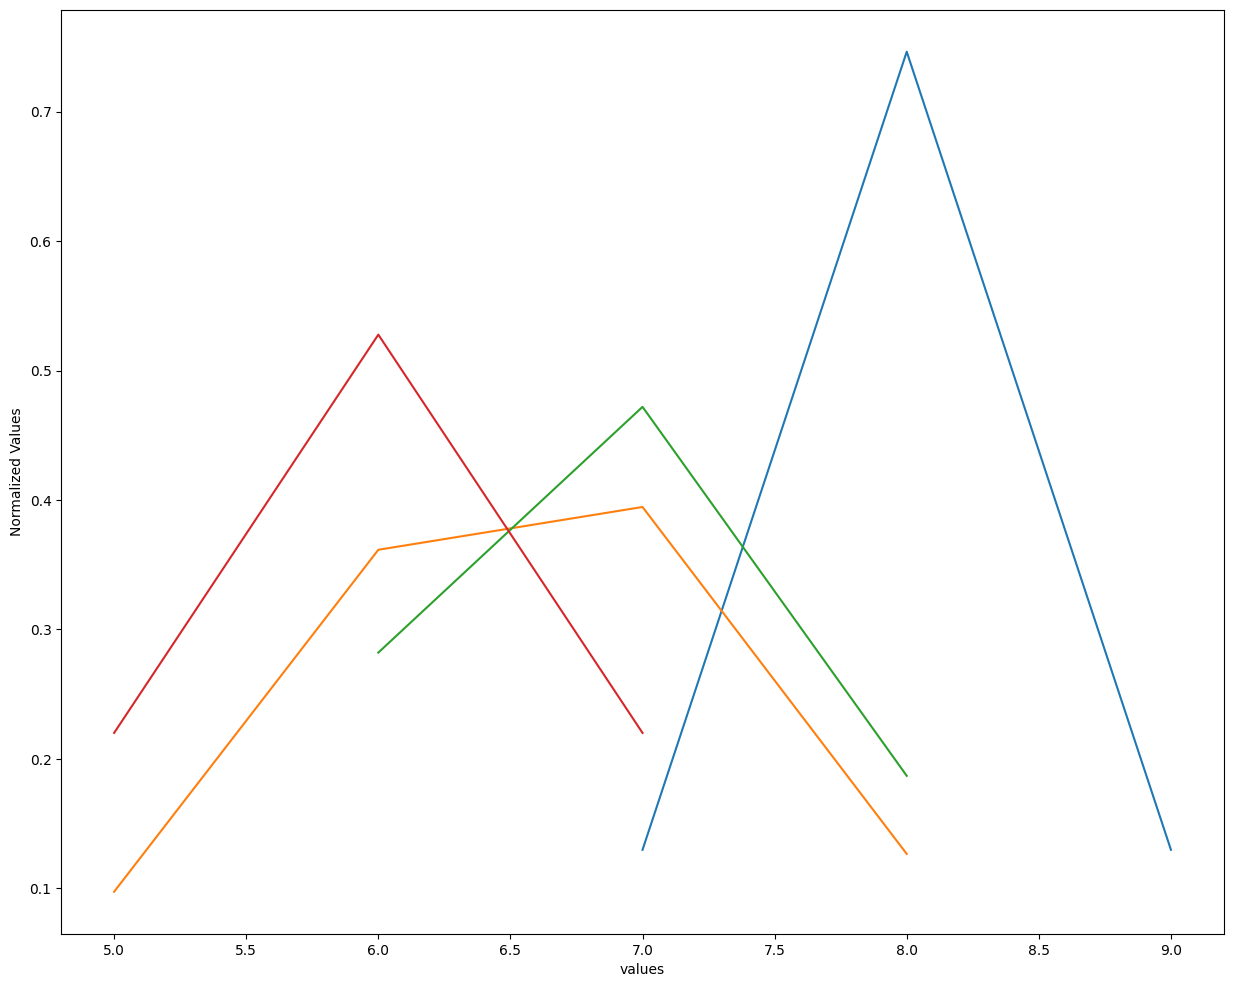

In [7]:
normalDistributionGraphGenarator(ANOVA_Data['Honey Chicken'],ANOVA_Data['Pepper Chicken'],ANOVA_Data['Spicy Chicken'],ANOVA_Data['Tandoori Chicken'])

printing TTEST Data Table

In [8]:
TTEST_Data

,Pre_Score,Post_Score
0,18,22
1,21,25
2,16,17
3,22,24
4,19,16
5,24,29
6,17,20
7,21,23
8,23,19
9,18,20


Normalization graph for all columns of TTEST Data

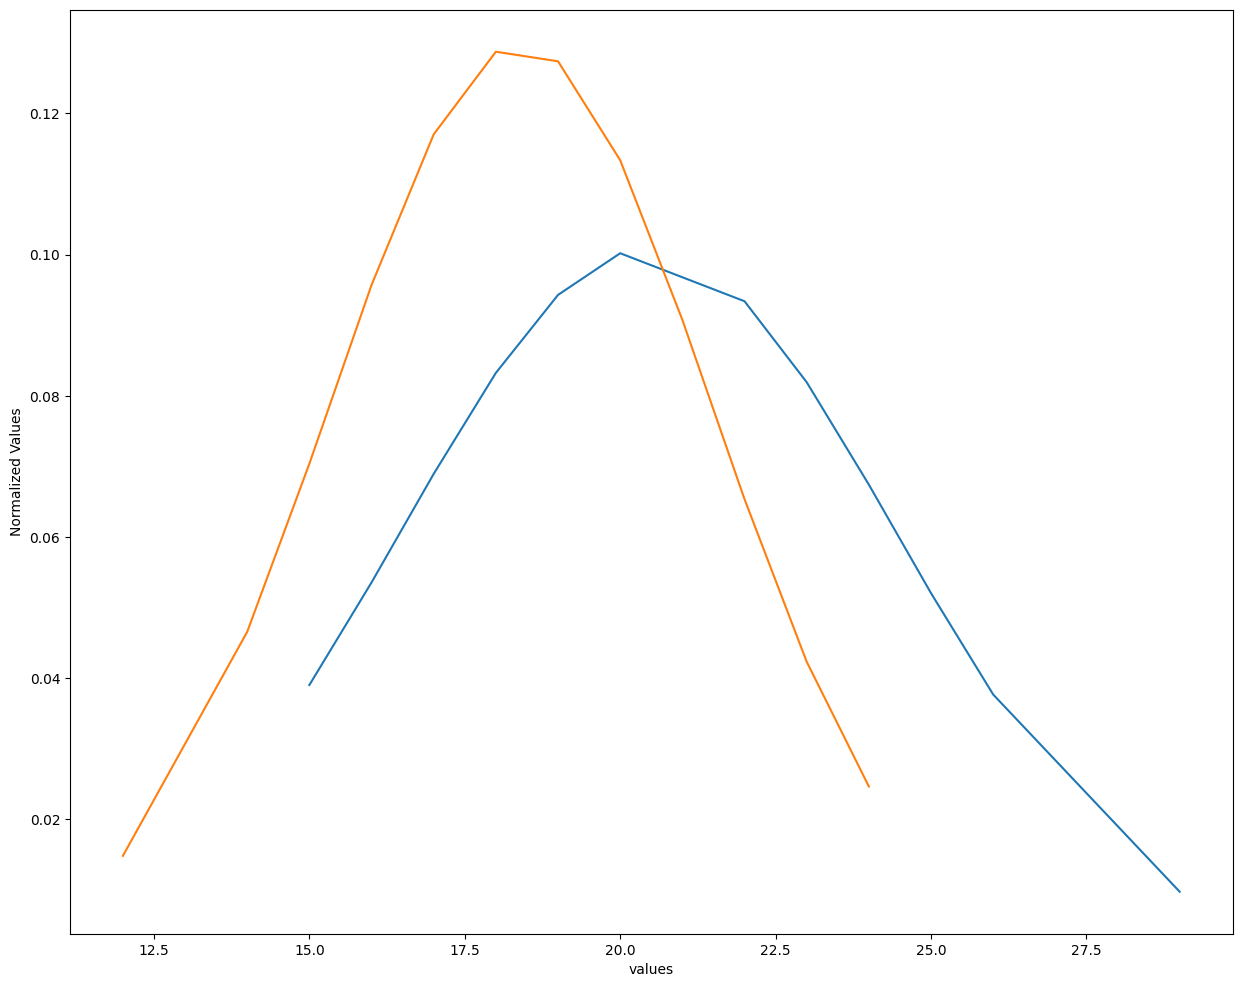

In [9]:
normalDistributionGraphGenarator(TTEST_Data['Post_Score'],TTEST_Data['Pre_Score'])

# Hypothesis Testing
Default Testing is based on Two-side values (Two-tailed-test)

## t-test

In [10]:
TTEST_Data.describe()

,Pre_Score,Post_Score
count,20.000000,20.000000
mean,18.400000,20.450000
std,3.152276,4.058454
min,12.000000,15.000000
25%,16.000000,17.750000
50%,18.000000,19.500000
75%,21.000000,24.000000
max,24.000000,29.000000


Defining the level of significance 

means this is permissible range where distribution data should be occurred

it is simply a minimum probability value in which the data should be accepted
- TTEST_Level_of_Significance = 5%

In [11]:
TTEST_Level_of_Significance=0.05

### one sample test

##### for column Pre_Score 

NULL Hypothesis (Ho): The values of column Pre_Score is around 20

hence let for Ho population_mean=20

In [13]:
population_mean=20

In [14]:
t_value,p_value=scipy.stats.ttest_1samp(TTEST_Data['Pre_Score'],popmean=population_mean)
print("T-Statistic Value: ",abs(t_value),"\nProbability-Value: ",p_value)

T-Statistic Value:  2.2699212261400974 
Probability-Value:  0.03504258228701023


In [37]:
if HypothesisComparerUsingPValue(p_value,TTEST_Level_of_Significance)==True:
    print("Values of the column is around ",population_mean)
else:
    print("Values of column is not around ",population_mean)

NULL Hypothesis is Accepted
Values of the column is around  20


###### Explaination for above case

- given population_mean is **20**
- if we see actual mean of column Pre_Score is **18.4**
- Now defined level of significance is **0.05 (5%)**
- hence by level of significance, given column should have 95% of total mean of population mean
- calculated probability value is :  **0.03504** (p_value) 
- this is cumulative probability of all elements of the data
- here p_value is **less** than TTEST_Level_of_Significance
- hence the probability of coccurence of the data in given population is less than defined permissible value 
- hence are assumption of that values are around is 20 is gone wrong
- hence NULL Hypothesis is Rejected

##### for column Post_Score 

NULL Hypothesis (Ho): The values of column Post_Score is around 20

hence let for Ho population_mean=20

In [16]:
population_mean=20

In [17]:
t_value,p_value=scipy.stats.ttest_1samp(TTEST_Data['Post_Score'],popmean=population_mean)
print("T-Statistic Value: ",abs(t_value),"\nProbability-Value: ",p_value)

T-Statistic Value:  0.49586885793428465 
Probability-Value:  0.6256740287436588


In [18]:
if HypothesisComparerUsingPValue(p_value,TTEST_Level_of_Significance)==True:
    print("Values of the column is around ",population_mean)
else:
    print("Values of column is not around ",population_mean)

NULL Hypothesis is Accepted
Values of the column is around  20


###### Explaination for above case

- given population_mean is **20**
- if we see actual mean of column Pre_Score is **20.45**
- Now defined level of significance is 0.05 (5%)
- hence by level of significance, given column should have 95% of total mean of population mean
- calculated probability value is :  **0.6256 (p_value)**
- this is cumulative probability of all elements of the data
- here p_value is **Greater** than TTEST_Level_of_Significance
- hence the probability of coccurence of the data in given population is greater than defined permissible value 
- hence are assumption of that values are around is 20 is right
- hence NULL Hypothesis is Accepted

### Two sample Test

NULL Hypothesis (Ho): The values of column Post_Score and values of column Pre_Score is same

hence let Ho: means for both columns is same x1_mean=x2_mean

In [19]:
t_value,p_value=scipy.stats.ttest_ind(TTEST_Data['Pre_Score'],TTEST_Data['Post_Score'],alternative='less')
print("T-Statistic Value: ",abs(t_value),"\nProbability-Value: ",p_value)

T-Statistic Value:  1.7840292427015179 
Probability-Value:  0.04120305388281875


In [20]:
if HypothesisComparerUsingPValue(p_value,TTEST_Level_of_Significance)==True:
    print("samples have nearly identical average (expected) values ")
else:
    print("samples do not have identical means")

NULL hypothesis is Rejected
samples do not have identical means


###### Explaination for above case
- Now defined level of significance is 0.05 (5%)
- hence by level of significance, given column should have 95% of total mean of population mean
- calculated probability value is :  **0.04120(p_value)**
- this is cumulative probability of all elements of the data for both columns to each other
- here p_value is **less** than TTEST_Level_of_Significance
- hence the probability of is less than defined permissible value 
- hence are assumption of that values are from same population is gone wrong
- hence NULL Hypothesis is Rejected

Extra:
here means of both column are get calculated and mean of one column is tested to elements of other column and vice-versa, and final probability get calculated

## ANOVA test

Defining the level of significance 

means this is permissible range where distribution data should be occurred

it is simply a minimum probability value in which the data should be accepted
- ANOVA_Level_of_Significance = 10%

In [39]:
ANOVA_Level_of_Significance = 0.1

In [40]:
ANOVA_Data.describe()

,Honey Chicken,Pepper Chicken,Spicy Chicken,Tandoori Chicken
count,7.00000,7.000000,7.000000,7.000000
mean,8.00000,6.571429,6.857143,6.000000
std,0.57735,0.975900,0.899735,0.816497
min,7.00000,5.000000,6.000000,5.000000
25%,8.00000,6.000000,6.000000,5.500000
50%,8.00000,7.000000,7.000000,6.000000
75%,8.00000,7.000000,7.500000,6.500000
max,9.00000,8.000000,8.000000,7.000000


#### ANOVA test for all column

In [54]:
t_value,p_value=scipy.stats.f_oneway(ANOVA_Data['Honey Chicken'],ANOVA_Data['Pepper Chicken'],ANOVA_Data['Spicy Chicken'],ANOVA_Data['Tandoori Chicken'])
print("T-Statistic Value: ",abs(t_value),"\nProbability-Value: ",p_value)
if HypothesisComparerUsingPValue(p_value,ANOVA_Level_of_Significance)==True:
    print("samples have nearly identical average (expected) values ")
else:
    print("samples do not have identical means")

T-Statistic Value:  7.172413793103451 
Probability-Value:  0.0013322300743224683
NULL hypothesis is Rejected
samples do not have identical means


#### ANOVA test for last three columns

In [55]:
t_value,p_value=scipy.stats.f_oneway(ANOVA_Data['Pepper Chicken'],ANOVA_Data['Spicy Chicken'],ANOVA_Data['Tandoori Chicken'])
print("T-Statistic Value: ",abs(t_value),"\nProbability-Value: ",p_value)
if HypothesisComparerUsingPValue(p_value,ANOVA_Level_of_Significance)==True:
    print("samples have nearly identical average (expected) values ")
else:
    print("samples do not have identical means")

T-Statistic Value:  1.647058823529412 
Probability-Value:  0.22035134388208824
NULL Hypothesis is Accepted
samples have nearly identical average (expected) values 
